In [1]:
import pandas as pd

ds = pd.read_csv("locales_madrid.csv", sep=";", encoding='ISO-8859-1')
ds.head(2)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
0  270039338                  1  CENTRO                            101   
1  270039445                  1  CENTRO                            102   

      desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
0  PALACIO                            NaN                      NaN   
1  EMBAJADORES                        NaN                      NaN   

   desc_seccion_censal_local coordenada_x_local coordenada_y_local  ...  \
0                         20           439427,6         4473405,53  ...   
1                         22                  0                  0  ...   

           desc_tipo_agrup id_planta_agrupado  id_local_agrupado  \
0                      NaN                 PB                NaN   
1  Galeria de Alimentacion                 PB                  1   

                                              rotulo  id_seccion  \
0                         V.O.T. DE N.P.S. FRANCISCO           Q   
1  REPARACI0N DE CALZADO Y ARREGLOS VARIOS, DUPLI...           S   

                                     desc_seccion id_division  \
0  ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES          86   
1                                 OTROS SERVICIOS          95   

                                       desc_division  id_epigrafe  \
0                             ACTIVIDADES SANITARIAS       861001   
1  REPARACI0N DE ORDENADORES, EFECTOS PERSONALES ...       952002   

               desc_epigrafe  
0  ACTIVIDADES HOSPITALARIAS  
1      REPARACION DE CALZADO  

[2 rows x 46 columns]

In [2]:
columns = [
    'desc_distrito_local', 
    'desc_tipo_agrup', 
    'id_seccion', 
    'desc_seccion', 
    'id_division', 
    'desc_division',
    'id_epigrafe',
    'desc_epigrafe'
]
#ds = ds[columns]
ds.head(5)

id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
0  270039338                  1  CENTRO                            101   
1  270039445                  1  CENTRO                            102   
2  270039446                  1  CENTRO                            102   
3  270039474                  1  CENTRO                            102   
4  270039477                  1  CENTRO                            102   

      desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
0  PALACIO                            NaN                      NaN   
1  EMBAJADORES                        NaN                      NaN   
2  EMBAJADORES                        NaN                      NaN   
3  EMBAJADORES                        NaN                      NaN   
4  EMBAJADORES                        NaN                      NaN   

   desc_seccion_censal_local coordenada_x_local coordenada_y_local  ...  \
0                         20           439427,6         4473405,53  ...   
1                         22                  0                  0  ...   
2                         22                  0                  0  ...   
3                         22          439808,59         4473301,53  ...   
4                         22          439813,59         4473301,53  ...   

           desc_tipo_agrup id_planta_agrupado  id_local_agrupado  \
0                      NaN                 PB                NaN   
1  Galeria de Alimentacion                 PB                  1   
2  Galeria de Alimentacion                 PB                 14   
3                      NaN                 PB                NaN   
4                      NaN                 PB                NaN   

                                              rotulo  id_seccion  \
0                         V.O.T. DE N.P.S. FRANCISCO           Q   
1  REPARACI0N DE CALZADO Y ARREGLOS VARIOS, DUPLI...           S   
2          DIA (PTOS 14, 16 A 18, 20 A 22) (CON HMC)           G   
3                                      LIBRERIA ROMO           G   
4                                     ANDRES SERRANO           G   

                                        desc_seccion id_division  \
0     ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES          86   
1                                    OTROS SERVICIOS          95   
2  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   
3  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   
4  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...          47   

                                       desc_division  id_epigrafe  \
0                             ACTIVIDADES SANITARIAS       861001   
1  REPARACI0N DE ORDENADORES, EFECTOS PERSONALES ...       952002   
2  COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...       471101   
3  COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...       476101   
4  COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...       477901   

                                       desc_epigrafe  
0                          ACTIVIDADES HOSPITALARIAS  
1                              REPARACION DE CALZADO  
2  COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO E...  
3                    COMERCIO AL POR MENOR DE LIBROS  
4  COMERCIO AL POR MENOR DE ARTICULOS DE SEGUNDA ...  

[5 rows x 46 columns]

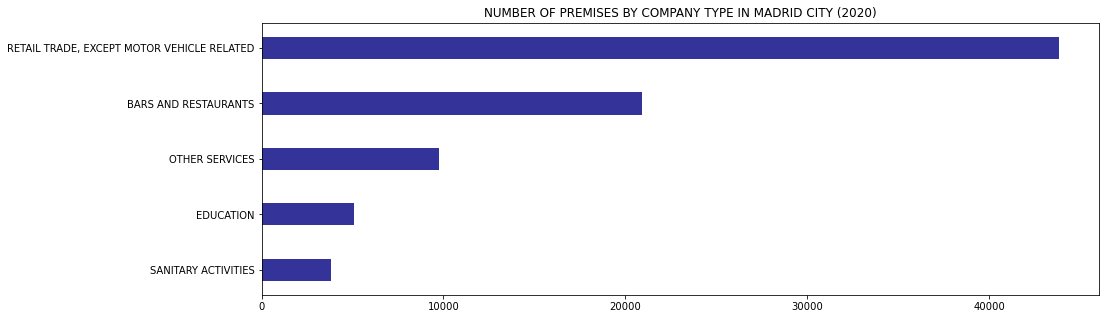

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mapping = {
    'COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE MOTOR Y MOTOCICLETAS': 'RETAIL TRADE, EXCEPT MOTOR VEHICLE RELATED',
    'SERVICIOS DE COMIDAS Y BEBIDAS': 'BARS AND RESTAURANTS',
    'OTROS SERVICIOS PERSONALES': 'OTHER SERVICES',
    'EDUCACI0N': 'EDUCATION',
    'ACTIVIDADES SANITARIAS': 'SANITARY ACTIVITIES'
}

ds2 = ds.copy()

ds2 = (ds2[['id_division','desc_division']]
    .groupby('desc_division')
    .count()
    .reset_index()
    .rename(columns={'id_division':'no'})
    .sort_values('no', ascending=False)
    .head(5)
    .sort_values('no', ascending=True))

ds2['desc_division'] = ds2['desc_division'].transform(lambda s: mapping[s])

plot = ds2.plot.barh(
    title="NUMBER OF PREMISES BY COMPANY TYPE IN MADRID CITY (2020)",
    x='desc_division', 
    y='no', 
    left=0,
    width=0.4, 
    xlabel='',
    figsize=(15,5), 
    legend=False,
    colormap='terrain')

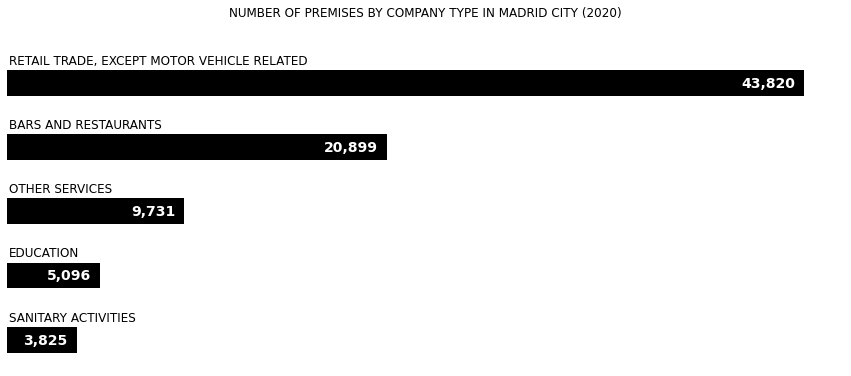

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt


ds1 = ds.copy()
ds1 = (ds1[['id_division','desc_division']]
    .groupby('desc_division')
    .count()
    .reset_index()
    .rename(columns={'id_division':'no'})
    .sort_values('no', ascending=False)
    .head(5)
    .sort_values('no', ascending=True))

ds1['no'] = ds1['no'] / 1000
ds1['desc_division'] = ds1['desc_division'].transform(lambda s: mapping[s])

plot = ds1.plot.barh(
    title="NUMBER OF PREMISES BY COMPANY TYPE IN MADRID CITY (2020)",
    x='desc_division', 
    y='no', 
    left=0,
    width=0.4, 
    figsize=(15,5), 
    legend=False,
    colormap='gray')

plot.set_yticks([])
plot.set_ylabel("")
plot.axis('off')
ttl = plot.title
ttl.set_position([.5, 1.10])
plt.subplots_adjust(top=1)

for i, (p, pr) in enumerate(zip(ds1['desc_division'], ds1['no'])):
    plot.text(
        s=p, 
        x=0.1, 
        y=i + 0.35, 
        color="black",  
        verticalalignment="center", 
        size=12)
    plot.text(
        s='{:,g}'.format(pr * 1000), 
        x=pr - 0.5, 
        y=i, 
        color="w",
        weight="bold",
        verticalalignment="center", 
        horizontalalignment="right", 
        size=14)


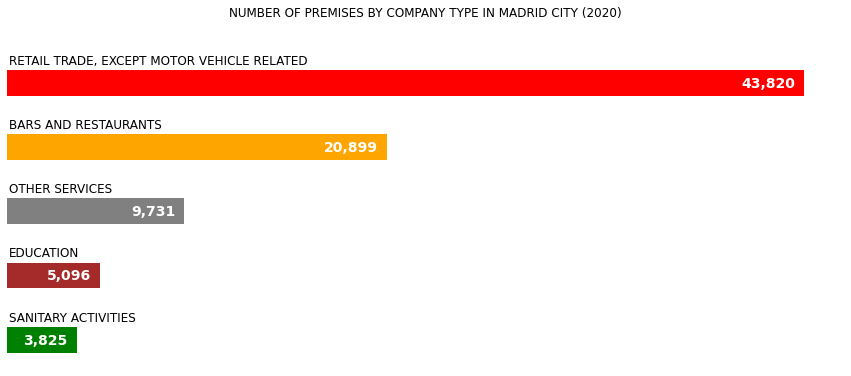

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt


ds1 = ds.copy()
ds1 = (ds1[['id_division','desc_division']]
    .groupby('desc_division')
    .count()
    .reset_index()
    .rename(columns={'id_division':'no'})
    .sort_values('no', ascending=False)
    .head(5)
    .sort_values('no', ascending=True))

ds1['no'] = ds1['no'] / 1000
ds1['desc_division'] = ds1['desc_division'].transform(lambda s: mapping[s])

plot = ds1.plot.barh(
    title="NUMBER OF PREMISES BY COMPANY TYPE IN MADRID CITY (2020)",
    x='desc_division', 
    y='no', 
    left=0,
    width=0.4, 
    figsize=(15,5), 
    legend=False,
    color=['green', 'brown', 'gray', 'orange', 'red'])

plot.set_yticks([])
plot.set_ylabel("")
plot.axis('off')
ttl = plot.title
ttl.set_position([.5, 1.10])
plt.subplots_adjust(top=1)

for i, (p, pr) in enumerate(zip(ds1['desc_division'], ds1['no'])):
    plot.text(
        s=p, 
        x=0.1, 
        y=i + 0.35, 
        color="black",  
        verticalalignment="center", 
        size=12)
    plot.text(
        s='{:,g}'.format(pr * 1000), 
        x=pr - 0.5, 
        y=i, 
        color="w",
        weight="bold",
        verticalalignment="center", 
        horizontalalignment="right", 
        size=14)

In [13]:
bars = ds.copy()
by_bar = bars['desc_division'].fillna('NO') == 'SERVICIOS DE COMIDAS Y BEBIDAS'

(bars
    .loc[by_bar, ['id_epigrafe', 'desc_epigrafe']]
    .groupby('desc_epigrafe')
    .count()
    .rename(columns={'id_epigrafe': 'no'})
    .sort_values('no', ascending=False)
    .reset_index())

desc_epigrafe    no
0                                      BAR CON COCINA  4585
1                                     BAR RESTAURANTE  4388
2                                           CAFETERIA  3240
3                                         RESTAURANTE  2700
4                                      BAR SIN COCINA  1730
5   SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y C...  1364
6                        BAR ESPECIAL SIN ACTUACIONES   972
7                       RESTAURANTES DE COMIDA RAPIDA   559
8        SERVICIOS DE COMEDOR EN CENTROS PARA MAYORES   331
9   OTROS SERVICIOS DE COMIDAS EN INSTALACIONES DE...   199
10                                            TABERNA   174
11                                   CAFE ESPECTACULO   130
12  COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...   101
13               CHOCOLATERIA/SALON DE TE Y HELADERIA    91
14  SALONES DE BANQUETES Y PROVISION COMIDAS PARA ...    88
15                       BAR ESPECIAL CON ACTUACIONES    87
16  SERVICIOS DE COMEDOR EN CENTROS DE ACTIVIDADES...    84
17                       AUTOSERVICIO DE RESTAURACION    42
18  SERVICIOS DE PREPARACI0N DE COMIDAS EN HOSPITALES    19
19                                         CIBER-CAFE     8
20  VENDEDOR AMBULANTE DE ALIMENTOS PREPARADOS PAR...     7

In [14]:
ds3 = ds.copy()
by_centro = ds3['nombre_agrupacion'].fillna('NO').str.contains('PLAZA RIO')
ds3 = ds3.loc[by_centro, ['rotulo', 'nombre_agrupacion']]
ds3

rotulo nombre_agrupacion
10056   ROTULO NO INFORMADO       PLAZA RIO 2
10057       VENTAS DE GAFAS       PLAZA RIO 2
10058         SIN ACTIVIDAD       PLAZA RIO 2
10059         SIN ACTIVIDAD       PLAZA RIO 2
10060                TRAMAS       PLAZA RIO 2
...                     ...               ...
118546        SIN ACTIVIDAD       PLAZA RIO 2
118547        SIN ACTIVIDAD       PLAZA RIO 2
118548        SIN ACTIVIDAD       PLAZA RIO 2
118549        SIN ACTIVIDAD       PLAZA RIO 2
118617  ROTULO NO INFORMADO       PLAZA RIO 2

[210 rows x 2 columns]